## Logistic Regression

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.optimize as opt
import ex2_func as fn

# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 25, 'font.family': 'ubuntu'})
%matplotlib inline

## 1 Logistic Regression

In the first part of this exercise, logistic regression model is employed to predict whether a student gets admitted to a university.  Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression.  For each training example, you have the applicant's scores on two exams and the admissions decision.  To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores.

####  Loading and Visualizing Data

In [2]:
directory = os.getcwd() + '/ex2data1.txt'
#an alternative to pandas read_csv
data = np.genfromtxt(directory,delimiter=',')

X = data[:,(0,1)]
y = data[:,-1].reshape(len(X),1)

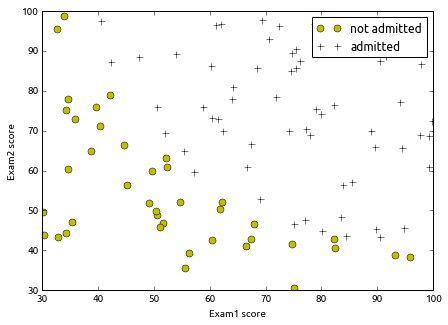

In [3]:
# split data
data_1 = data[data[:,2]==1]
data_0 = data[data[:,2]==0]

# plot data
plt.figure(figsize=(7,5))
plt.plot(data_0[:,0],data_0[:,1], 'ro', color='y', markersize=7, label='not admitted')
plt.plot(data_1[:,0],data_1[:,1], 'r+', color='k', markersize=7, label='admitted')
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.legend();

#### Sigmoid Function


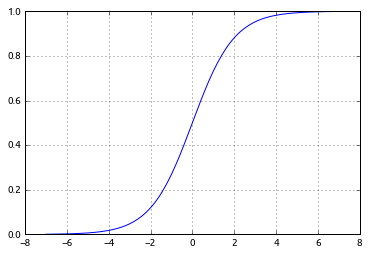

In [4]:
reload(fn)

# plot sigmoid
int = np.arange(-7,7,.1)
plt.plot(int,fn.sigmoid(int))
plt.grid()

## Cost Function & Gradient

In [5]:
reload(fn)

# add bias terms
m,n = X.shape
X_ = np.insert(X, 0, 1,axis=1)

# init parameters
init_theta = np.zeros(n+1)

# compute cost and the gradient
cost = fn.costFunction(init_theta,X_,y)
grad = fn.gradient(init_theta,X_,y)

print 'Cost at initial theta (zeros): {} '.format(cost[0])
print '\nGradient at initial theta (zeros):'
print ' {} \n'.format(grad)

Cost at initial theta (zeros): 0.69314718056 

Gradient at initial theta (zeros):
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]] 



## Optimizing using fmin

In [6]:
reload(fn)

result = opt.fmin_tnc(func=fn.costFunction,
                      x0=init_theta, 
                      fprime=fn.gradient, 
                      args=(X_, y))

theta = result[0]

print '\nCost at theta found by fminunc: {}'.format(fn.costFunction(theta,X_,y))
print '\ntheta: {} '.format(theta)


Cost at theta found by fminunc: [ 0.2034977]

theta: [-25.16131843   0.20623159   0.20147148] 


#### Evaluating Logistic Regression

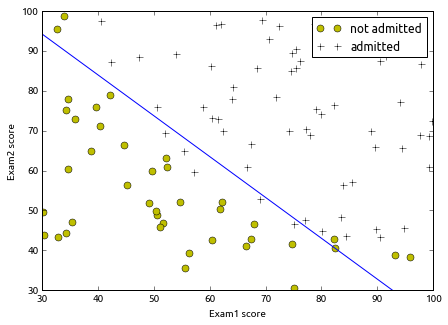

In [7]:
plt.figure(figsize=(7,5))
plt.axis([30, 100, 30, 100])
plt.plot(data_0[:,0],data_0[:,1], 'ro', color='y', markersize=7, label='not admitted')
plt.plot(data_1[:,0],data_1[:,1], 'r+', color='k', markersize=7, label='admitted')
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.legend()
# initialize  two points on x axis
plot_x = np.array((np.min(X_[:,2])-2 , np.max(X_[:,2])+2))
# find corresponding values on decision boundary 
ploy_y = -1/ theta[2] * (theta[1]*plot_x +theta[0])
plt.plot(plot_x, ploy_y);

## Performance of the Algoritm

In [8]:
ex1 = 45
ex2 = 85
newX = np.array([1,ex1,ex2])
prob = fn.sigmoid(np.dot(theta.T,newX))
print 'For a student with scores 45 and 85, we predict an admission probability of {}\n'.format(prob)

For a student with scores 45 and 85, we predict an admission probability of 0.776290620821



In [9]:
reload(fn)

train_ac = fn.accuracy(X_,y,theta)
print 'Train Accuracy: %{}'.format(train_ac)

Train Accuracy: %89.0


## 2 Regularized Logistic Regression

In the second part of this exercise, logistic regression algorithm from part one will be improved by adding a regularization term. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

#### Loading and Visualizing Data

In [10]:
directory = os.getcwd() + '/ex2data2.txt'
data = pd.read_csv(directory,header=None, names=['Test 1', 'Test 2', 'Accepted'])

cols =  data.shape[1]
y = data.iloc[:,-1:cols]

data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


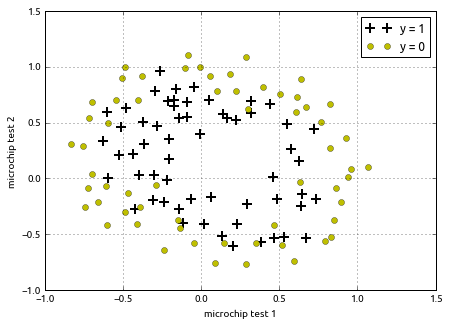

In [11]:
accepted = data[data['Accepted'] == 1]
not_accepted = data[data['Accepted'] == 0]
plt.figure(figsize=(7,5))
plt.plot(accepted['Test 1'],accepted['Test 2'],'k+',label = 'y = 1',ms=10,mew=2)
plt.plot(not_accepted['Test 1'],not_accepted['Test 2'],'yo', label = 'y = 0', ms=6,mew=.3)
plt.grid()
plt.xlabel('microchip test 1')
plt.ylabel('microchip test 2')
plt.legend();

#### Adding Polynomial Features

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly =PolynomialFeatures(degree=6,interaction_only=False,include_bias=True)
X = pd.DataFrame(poly.fit_transform(data[['Test 1','Test 2']]))
# poly.powers_
X.head()
# notice that X has already bias terms

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


#### Cost Function and Gradient

In [13]:
reload(fn)

# initialize fitting parameters
m , n = X.shape
initial_theta = np.zeros(n)

# Set regularization parameter lambda to 1
lambda_ = 1

# cost with inital thetas
cost = fn.costFunctionReg(initial_theta, X, y, lambda_)
print 'Cost at initial theta (zeros): {}'.format(cost)

Cost at initial theta (zeros): [ 0.69314718]


#### Optimization algoritm

In [14]:
reload(fn)

result = opt.fmin_tnc(func=fn.costFunctionReg, x0=initial_theta, fprime=fn.gradientReg, args=(X, y, lambda_))
result

(array([ 1.25441471,  0.62276773,  1.1924277 , -2.00505529, -0.87290727,
        -1.36184266,  0.12573853, -0.3553685 , -0.35603634, -0.17096335,
        -1.45784635, -0.06683334, -0.61498631, -0.25080279, -1.18096032,
        -0.22566832, -0.20562889, -0.06382329, -0.27187029, -0.27658998,
        -0.46836026, -1.03247358,  0.01627584, -0.29695276,  0.00581071,
        -0.32631632, -0.12073387, -0.93023012]), 54, 4)

#### Performance  of the Algoritm

In [16]:
reload(fn)
# trained theta
theta_min = np.matrix(result[0])
# compute trained accuracy
n = fn.accuracyReg(theta_min,X,y)
print 'Train Accuracy: %{}'.format(round(n,2))

Train Accuracy: %83.05
